In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import StanfordNERTagger
from nltk.tokenize import sent_tokenize
from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer


from sklearn.linear_model import LogisticRegressionCV
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk import word_tokenize, pos_tag
from nltk.tag import StanfordNERTagger
from sklearn.linear_model import RidgeClassifier
# from tweetokenize import Tokenizer
from sklearn.model_selection import GridSearchCV


import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from nltk.tag.stanford import StanfordNERTagger
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import confusion_matrix,classification_report, precision_recall_fscore_support, accuracy_score
from sklearn.pipeline import Pipeline



In [2]:
### Creating a function to clean_up the twitter_text
#### ALL WORKS!!!!
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

#Additional
import string
string.punctuation

# In this edit I didn't remove # and @ hoping to find the way to remove it together with the followings
punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

import preprocessor as p
import re

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.NUMBER)
    clean_text = p.clean(text)
    
    return clean_text

def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)
def clean_tweet_text(text_column):
    '''
    takes a columns in dataframe with tweets text: 
    Outputs: PD Series of tokenized docs
    lower case, 
    symbol_set charachters removed
    punctuation removed
    words stemmed and lemmatized
    
    '''
    
    
    # converting from pd to list
    corpus = text_column.values.tolist()
    
    #Removing all HTTPs
    docs_no_http = [ re.sub(r'https?:\/\/.*\/\w*', '', doc) for doc in corpus ]
    #First ---> tokenize docs
    tokenized_docs = [doc.split() for doc in docs_no_http]
    # Lower case words in doc
    tokenized_docs_lowered  = [[word.lower() for word in doc]
                                for doc in tokenized_docs]

    # Removing punctuation from docs
    cleaned_docs = [[remove_symbols(word, punct) for word in doc] 
                    for doc in tokenized_docs_lowered]

    ### Removing stop words
#     stop_words = set(nltk.corpus.stopwords.words('english'))
#     docs_no_stops = [[word for word in doc if word not in stop_words] 
#                      for doc in cleaned_docs]
    # Lemmatize words in docs
    docs_lemmatized = [[lemmer.lemmatize(word) for word in doc]
                      for doc in docs_no_stops]
    
    # Stem words in docs
    docs_stemmed = [[stemmer.stem(word) for word in doc]
                      for doc in docs_lemmatized]
    
    # Removes mentions, emotions, hashtags and emojies
    docs_no_mentions = [preprocessing_text(' '.join(doc)) for doc in docs_stemmed]
    
    bag = []
    for doc in docs_no_mentions:
        if len(doc) >= 2:
            bag.append(doc)
    
    # converts into list of lists
    bow = [list(tweet.split(' ')) for tweet in bag]
    
    
    # convert docs into pd series
    full_service_docs_series = pd.Series( (v[0] for v in bow) )
    
    return bag, bow, docs_stemmed, full_service_docs_series

In [3]:
venezuela_tweets = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tweets_mask = venezuela_tweets['is_retweet'] == False
tweets = venezuela_tweets[tweets_mask]

tweets_english = tweets[tweets['tweet_language'] == 'en']

In [5]:
data = tweets_english[['user_screen_name','tweet_text']]


In [6]:
def get_bag_of_words(tweet):
    tokenized = [ word for word in tweet.split() if not(word.startswith("http")) and not(word.startswith('#'))]
    return ' '.join(tokenized)



In [7]:
data['bag_of_words'] = data['tweet_text'].apply(get_bag_of_words)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
import string

string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')


lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

data['bag_of_words'] = data['bag_of_words'].apply(lambda x: x.lower())
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: remove_symbols(x, punct))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: lemmer.lemmatize(x))
data['bag_of_words'] = data['bag_of_words'].apply(lambda x: stemmer.stem(x))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

# What is Random Forest Classifier?

Random Forest is an esemble method. In general, an **ensemble** method combines many weak models to form a strong model. We train multiple models on the data, such that each is different. They could be trained on different subsets of the data, or trained in different ways, or even be completely different types of models.

Once we've done that, we need to combine the models to form a single model.

Train each learner on different subset of data.

A classification tree is a decision tree to predicts whether a data point is in one class or another. Each branch node is a decision, choosing left or right based on the value of a certain feature. Each leaf node gives the probability that a data point is in one class or another.


A classification tree is built by

1. Iteratively divide the nodes such that (entropy/gini impurity) is minimized
2. Various stopping conditions like a depth limit
3. Prune trees by merging nodes

# Decision Tree Summary
What are the pros and cons?

Pros

1. No feature scaling needed
2. Model nonlinear relationships
3. Can do both classification and regression
4. Robust
5. Highly interpretable

Cons

1. Can be expensive to train
2. Often poor predictors because of high variance


# Random Forests

Bagging decision trees are pretty cool, but the trees still tend to look pretty similar. We want a way to make the trees more different (decorrelate them) without substantially increasing the bias of each tree.

Random forests do this with subspace sampling. When we are building a tree and considering the feature to use at each split, we only consider a few of them, randomly chosen. The number of features  𝑚  to consider at each split is a hyperparameter; typically  𝑚=𝑘⎯⎯√  is used.

Again, the features to consider are chosen at each split, not each tree. Everyone gets this wrong.

Question: are features to consider chosen for each tree, or at each split?

For example, suppose we're building a model with nine features. One of them is really predictive, another is pretty good, and the others are just okay.

If we build an ensemble of bagged trees, probably each will use the good feature as the first split, and probably each will use the pretty-good feature at the next split. For the other splits the trees might differ, particularly father down when only a few points are being considered, but the first branches will be pretty much the same.

If we build a trees in a random forest, we'll only consider three (random) features for that first split. Only a fraction of the trees (around 30%) will consider the good feature on the first split, so they will use that. Some of the others will consider the pretty-good feature, so they will start there. The others will start at some other feature. Those trees will still consider the good and pretty-good features at some of the lower nodes, and will get to take advantage of them, but the overall structure of those trees will be completely different.

# Bag of Words
Tokenized and preprocessed corpus before vectorization

# Vectorization

The ultimate goal of indexing is to create a vector representation (signature) for each document. This vector representation will be used for:

mine the features that can caracterize classes of documents (supervised learning using labels)
mine the documents that have similar features to establish trends (unsupervised learning).
To do that, we need:

a fixed number of features
a quantitative value for each feature.
The number of features is given by the vocabulary over the corpus: the set of all possible words (tokens) found in all documents.

The ultimate goal of indexing is to create a vector representation (signature) for each document. This vector representation will be used for: mine the features that can caracterize classes of documents (supervised learning using labels) mine the documents that have similar features to establish trends (unsupervised learning). To do that, we need:

a fixed number of features
a quantitative value for each feature.
The number of features is given by the vocabulary over the corpus: the set of all possible words (tokens) found in all documents.

The quantitative value is given, for each doc, by counting the occurences of each of these words in the doc and by using a TF-IDF formula.



# the TFIDF vector
Words might show up a lot in individual documents, but their relevace is less important if they're in every document! We need to take into account words that show up everywhere and reduce their relative importance. The document frequency does exactly that:

𝑑𝑓(𝑡𝑒𝑟𝑚,𝑐𝑜𝑟𝑝𝑢𝑠)=# 𝑜𝑓 𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡𝑠 𝑡ℎ𝑎𝑡 𝑐𝑜𝑛𝑡𝑎𝑖𝑛 𝑎 𝑡𝑒𝑟𝑚# 𝑜𝑓 𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑐𝑜𝑟𝑝𝑢𝑠 
The inverse document frequency is defined in terms of the document frequency as

𝑖𝑑𝑓(𝑡𝑒𝑟𝑚,𝑐𝑜𝑟𝑝𝑢𝑠)=log1𝑑𝑓(𝑡𝑒𝑟𝑚,𝑐𝑜𝑟𝑝𝑢𝑠) .

TF-IDF is an acronym for the product of two parts: the term frequency tf and what is called the inverse document frequency idf. The term frequency is just the counts in a term frequency vector.

tf-idf  =𝑡𝑓(𝑡𝑒𝑟𝑚,𝑑𝑜𝑐𝑢𝑚𝑒𝑛𝑡)∗𝑖𝑑𝑓(𝑡𝑒𝑟𝑚,𝑐𝑜𝑟𝑝𝑢𝑠)

# Count Vectorizer


The only difference is that the TfidfVectorizer() returns floats while the CountVectorizer() returns ints. And that's to be expected – as explained in the documentation quoted above, TfidfVectorizer() assigns a score while CountVectorizer() counts

# Naive Bayes 
Meaning assume independence of words

probabilities, no distance calculations so efficent for high dimensions

# Gradient Boosting

Variance vs Bias
Boosting

1. Lowers variance by growing the model slowly over time (along with a few other tricks).
2. Lowers bias by stacking many small models into the final result.

We can only calculate residuals at the training data points!

We need some way of extending the values of the residuals to places we do not have data.

Solution:

Fit a model to the residuals!

The predictions from this model both:

Approximate the residuals at the places as we have data
Are defined everywhere

## Tuning the Learning Rate
The learning rate allows us to grow our boosted model slowly.

A large learning rate will cause the model to fit hard to the training data, which creates a high variance situation.

A smaller learning rate reduces the boosted models sensitivity to the training data.

# Confusion Matrix

# # True Positive:
1. Interpretation: You predicted positive and it’s true.
2. You predicted that a woman is pregnant and she actually is.

## True Negative:

1. Interpretation: You predicted negative and it’s true.
2. You predicted that a man is not pregnant and he actually is not.

## False Positive: (Type 1 Error)
1. Interpretation: You predicted positive and it’s false.
2. You predicted that a man is pregnant but he actually is not.

## False Negative: (Type 2 Error)
1. Interpretation: You predicted negative and it’s false.
2. You predicted that a woman is not pregnant but she actually is.

Just Remember, We describe predicted values as Positive and Negative and actual values as True and False.


## Recall
1. Out of all the positive classes, how much we predicted correctly. It should be high as possible.

## Precision
1. Out of all the classes, how much we predicted correctly. It should be high as possible.

## F-measure
1. It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

# Two Similar users modeled to each other using random forest

In [9]:
TrumpNewsz= data[data.user_screen_name == 'TrumpNewsz']

In [10]:
TrumpNewsDaily_= data[data.user_screen_name == 'TrumpNewsDaily_']

In [11]:
trump_news_comparison = pd.concat([TrumpNewsDaily_, TrumpNewsz])
trump_news_comparison.user_screen_name.value_counts()

TrumpNewsz         34665
TrumpNewsDaily_    32407
Name: user_screen_name, dtype: int64

In [12]:
X = trump_news_comparison.bag_of_words
y = trump_news_comparison.user_screen_name

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.3)

In [14]:
tfidf = TfidfVectorizer(decode_error='replace', max_features=150)
X_train = tfidf.fit_transform(X_train)

In [15]:
X_train

<46950x150 sparse matrix of type '<class 'numpy.float64'>'
	with 232038 stored elements in Compressed Sparse Row format>

In [16]:
X_test = tfidf.fit_transform(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=5,
                             random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [18]:
y_pred = rf.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5127720902494782

In [20]:
print(classification_report(y_test,y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

TrumpNewsDaily_       0.00      0.00      0.00      9804
     TrumpNewsz       0.51      1.00      0.68     10318

       accuracy                           0.51     20122
      macro avg       0.26      0.50      0.34     20122
   weighted avg       0.26      0.51      0.35     20122



[[    0  9804]
 [    0 10318]]


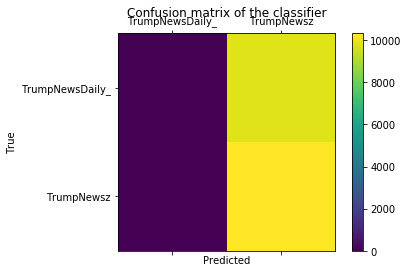

In [21]:
from sklearn.metrics import confusion_matrix

labels = ['TrumpNewsDaily_', 'TrumpNewsz']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingClassifier


In [23]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=.1,
     max_depth=4, random_state=0).fit(X_train, y_train)

In [24]:
clf.score(X_test, y_test)  

0.508895736010337

In [25]:
print(classification_report(y_test,y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

TrumpNewsDaily_       0.00      0.00      0.00      9804
     TrumpNewsz       0.51      1.00      0.68     10318

       accuracy                           0.51     20122
      macro avg       0.26      0.50      0.34     20122
   weighted avg       0.26      0.51      0.35     20122



[[    0  9804]
 [    0 10318]]


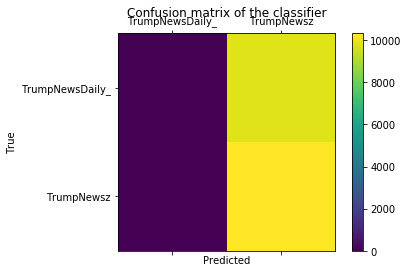

In [26]:
from sklearn.metrics import confusion_matrix

labels = ['TrumpNewsDaily_', 'TrumpNewsz']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Bayes 
Meaning assume independence of words

probabilities, no distance calculations so efficent for high dimensions

In [27]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()


In [28]:
classifier.fit(X_train.toarray(), y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# Predict Class
y_pred = classifier.predict(X_test.toarray())

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [30]:
accuracy

0.4956763741178809

In [31]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

TrumpNewsDaily_       0.48      0.54      0.51      9804
     TrumpNewsz       0.51      0.45      0.48     10318

       accuracy                           0.50     20122
      macro avg       0.50      0.50      0.50     20122
   weighted avg       0.50      0.50      0.49     20122



[[5294 4510]
 [5638 4680]]


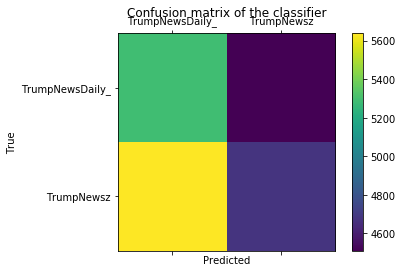

In [32]:
from sklearn.metrics import confusion_matrix

labels = ['TrumpNewsDaily_', 'TrumpNewsz']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression

In [33]:
lr = LogisticRegressionCV(cv=3, random_state=0).fit(X_train, y_train)


In [34]:
lr.scores_

{'TrumpNewsz': array([[0.51856111, 0.51856111, 0.5177305 , 0.50737972, 0.50099035,
         0.50041531, 0.50041531, 0.50041531, 0.5005431 , 0.5004792 ],
        [0.51859425, 0.51859425, 0.51833866, 0.5027476 , 0.49865815,
         0.49738019, 0.49686901, 0.49693291, 0.49680511, 0.49686901],
        [0.51856349, 0.51856349, 0.51837178, 0.50386606, 0.49607004,
         0.49536712, 0.49517541, 0.49517541, 0.49517541, 0.49517541]])}

In [35]:
y_pred = lr.predict(X_test)


[[    0  9804]
 [    0 10318]]


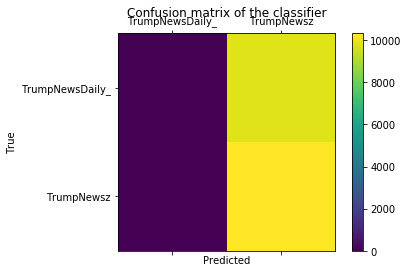

In [36]:
from sklearn.metrics import confusion_matrix

labels = ['TrumpNewsDaily_', 'TrumpNewsz']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
print(classification_report(y_test,y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                 precision    recall  f1-score   support

TrumpNewsDaily_       0.00      0.00      0.00      9804
     TrumpNewsz       0.51      1.00      0.68     10318

       accuracy                           0.51     20122
      macro avg       0.26      0.50      0.34     20122
   weighted avg       0.26      0.51      0.35     20122



# SGD Classifer

In [38]:
# from sklearn.linear_model import SGDClassifier

# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])
# sgd.fit(X_train, y_train)

# %time

# y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))

# Gridsearch

In [39]:
# # Grid Search Parameters
# parameters = {
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10,100,300]
#     }

In [40]:
# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)


In [41]:
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))
# print(clf.best_params_)

# Sophia4Trump vs. Sophia Turner

In [42]:
SophiaMillerC = data[data.user_screen_name == 'SophiaMillerC']

In [43]:
Sophia4Trump = data[data.user_screen_name == 'Sophia4Trump']

In [44]:
sophia_comparison = pd.concat([SophiaMillerC, Sophia4Trump])
sophia_comparison.user_screen_name.value_counts()

Sophia4Trump     12065
SophiaMillerC    11205
Name: user_screen_name, dtype: int64

In [45]:
X = sophia_comparison.bag_of_words
y = sophia_comparison.user_screen_name

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.3)

In [47]:
tfidf = TfidfVectorizer(decode_error='replace', max_features=150)
X_train = tfidf.fit_transform(X_train)

In [48]:
X_train

<16289x150 sparse matrix of type '<class 'numpy.float64'>'
	with 80482 stored elements in Compressed Sparse Row format>

In [49]:
X_test = tfidf.fit_transform(X_test)

# Random Forest Classifier on Sophia's

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=5,
                             random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [51]:
y_pred = rf.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5930382466695315

In [53]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

 Sophia4Trump       0.66      0.44      0.53      3613
SophiaMillerC       0.56      0.76      0.64      3368

     accuracy                           0.59      6981
    macro avg       0.61      0.60      0.59      6981
 weighted avg       0.61      0.59      0.58      6981



[[2549  819]
 [2022 1591]]


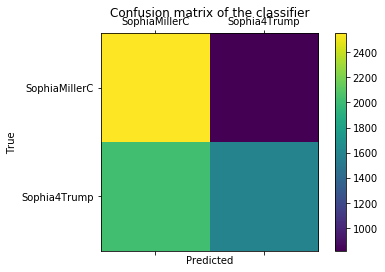

In [54]:
from sklearn.metrics import confusion_matrix

labels = ['SophiaMillerC', 'Sophia4Trump']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gradient Boost Classifier on Sophia's

In [55]:
from sklearn.ensemble import GradientBoostingClassifier


In [56]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
     max_depth=4, random_state=0).fit(X_train, y_train)

In [57]:
clf.score(X_test, y_test)  

0.6096547772525426

In [58]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

 Sophia4Trump       0.66      0.44      0.53      3613
SophiaMillerC       0.56      0.76      0.64      3368

     accuracy                           0.59      6981
    macro avg       0.61      0.60      0.59      6981
 weighted avg       0.61      0.59      0.58      6981



[[2549  819]
 [2022 1591]]


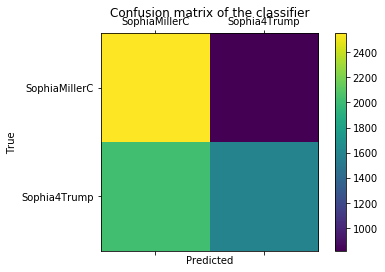

In [59]:
from sklearn.metrics import confusion_matrix

labels = ['SophiaMillerC', 'Sophia4Trump']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Bayes on Sophia

In [60]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [61]:
classifier.fit(X_train.toarray(), y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
# Predict Class
y_pred = classifier.predict(X_test.toarray())

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [63]:
accuracy

0.5589457097836986

In [64]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

 Sophia4Trump       0.57      0.60      0.58      3613
SophiaMillerC       0.55      0.52      0.53      3368

     accuracy                           0.56      6981
    macro avg       0.56      0.56      0.56      6981
 weighted avg       0.56      0.56      0.56      6981



[[1738 1630]
 [1449 2164]]


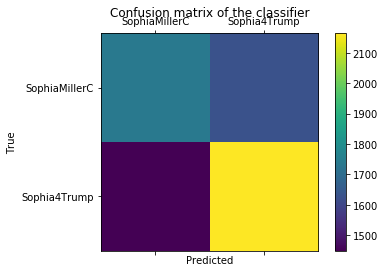

In [65]:
from sklearn.metrics import confusion_matrix

labels = ['SophiaMillerC', 'Sophia4Trump']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Logistic Regression on sophia

In [66]:
lr = LogisticRegressionCV(cv=3, random_state=0, multi_class='multinomial').fit(X_train, y_train)


In [67]:
lr.scores_

{'SophiaMillerC': array([[0.51887314, 0.61830234, 0.76965568, 0.7854907 , 0.79248757,
         0.79635426, 0.79561775, 0.79580188, 0.79580188, 0.79598601],
        [0.51888009, 0.60747836, 0.76496592, 0.78522748, 0.78725364,
         0.78596427, 0.78522748, 0.78522748, 0.78522748, 0.78522748],
        [0.51888009, 0.61374102, 0.76551851, 0.77767545, 0.78578007,
         0.78559587, 0.78578007, 0.78559587, 0.78559587, 0.78559587]])}

In [68]:
y_pred = lr.predict(X_test)
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

 Sophia4Trump       0.61      0.60      0.61      3613
SophiaMillerC       0.58      0.59      0.58      3368

     accuracy                           0.59      6981
    macro avg       0.59      0.59      0.59      6981
 weighted avg       0.59      0.59      0.59      6981



In [69]:
accuracy = accuracy_score(y_test, y_pred)

In [70]:
accuracy

0.5941842142959461

[[1976 1392]
 [1441 2172]]


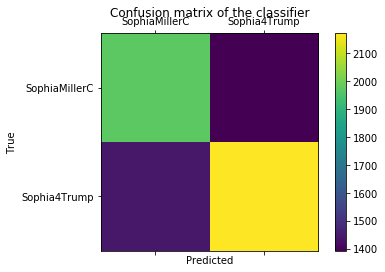

In [71]:
from sklearn.metrics import confusion_matrix

labels = ['SophiaMillerC', 'Sophia4Trump']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gridsearch

In [72]:
# # Grid Search Parameters
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10,100,300]
#     }

In [73]:
# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)


In [74]:
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))
# print(clf.best_params_)

# SGD Classifier

In [75]:
# from sklearn.linear_model import SGDClassifier

# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])
# sgd.fit(X_train, y_train)

# %time

# y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))

# Lauren Jones vs Lauren Jones


In [76]:
LaurenJonesGOP = data[data.user_screen_name == 'LaurenJonesGOP_']
LJG2 = data[data.user_screen_name == 'LaurenJonesGOP']

In [77]:
lauren_comparison = pd.concat([LaurenJonesGOP, LJG2])
lauren_comparison.user_screen_name.value_counts()

LaurenJonesGOP     16297
LaurenJonesGOP_    11068
Name: user_screen_name, dtype: int64

In [78]:
X = lauren_comparison.bag_of_words
y = lauren_comparison.user_screen_name

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =.3)

In [80]:
tfidf = TfidfVectorizer(decode_error='replace', max_features=150)
X_train = tfidf.fit_transform(X_train)

In [81]:
X_test = tfidf.fit_transform(X_test)

In [82]:
# Random Forest Classifier of Lauren Jones's

In [83]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=5,
                             random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
y_pred = rf.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

 LaurenJonesGOP       0.59      1.00      0.74      4845
LaurenJonesGOP_       0.29      0.00      0.00      3365

       accuracy                           0.59      8210
      macro avg       0.44      0.50      0.37      8210
   weighted avg       0.47      0.59      0.44      8210



In [86]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5894031668696711

In [87]:
# have explanation for tfidf, bag of words, vectorizers, random forest, 
# your result clearly explores what result actually 505. logistic regression, naive bayes.
# stay with two and false positive and false negative.
# try and change depth, see what results you get as depth gets higher.
# read all about the methods random forest gradient boosting. 
# plot confusion matrix.
# good visualization for confusion matrix. a square with fourspace.

[[4835   10]
 [3361    4]]


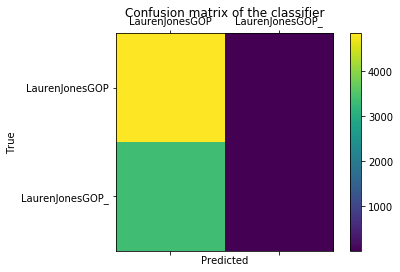

In [88]:
from sklearn.metrics import confusion_matrix

labels = ['LaurenJonesGOP', 'LaurenJonesGOP_']
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Gridsearch

In [89]:
# from sklearn.model_selection import GridSearchCV


In [90]:
# Grid Search Parameters
# parameters = {
#     "loss":["deviance"],
#     "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
#     "min_samples_split": np.linspace(0.1, 0.5, 12),
#     "min_samples_leaf": np.linspace(0.1, 0.5, 12),
#     "max_depth":[3,5,8],
#     "max_features":["log2","sqrt"],
#     "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
#     "n_estimators":[10,100,300]
#     }

In [91]:
# clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)


In [92]:
# grid search on n_estimators, max_depth :10,200,300 and then decrease max depth

In [93]:
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))
# print(clf.best_params_)

# SGD

In [94]:
# from sklearn.linear_model import SGDClassifier

# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])
# sgd.fit(X_train, y_train)

# %time

# y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))

In [95]:
# from sklearn.pipeline import Pipeline
